#### Nom , Prénom : Issa Abakar


# Social Data Analysis: Communities and Link Prediction



## First, let's install the potentially missing libraries 
(not necessary if you are certain these libs are installed on your system)

In [ ]:
! pip install pandas
! pip install networkx
! pip install seaborn

## Second, let's import the useful packages
You can avoid the first line if you are not using a Jupyter notebook. This line enables the visualization to be displayed in the notebook.

In [ ]:
%matplotlib inline

import networkx as nx
from networkx.algorithms import community
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Good, if you have not encounter any problems, we can start working now!

### First download the dataset (either visit my [professional web page](www.irit.fr/~Yoann.Pitarch) or the Moodle space of this course)

### Then, navigate through the documentation of the networkx package and find how to load networks in the GML format

You can have a look to this file by openning it with a basic text editor. Note that the graph is __undirected__.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pathData = "/content/drive/MyDrive/M2/Analyse_Graphe/Data/lesmis.gml"
g = nx.read_gml(pathData)

In [ ]:
print(nx.__version__)

2.6.3


# Community detection 

In this section, we will focus on community detection algorithm. For this, have a look to the networkx package documentation and apply the following community detection algorithms:
 
   1. Kernighan–Lin bipartition algorithm
   2. Percolation method
   3. Fluid communities algorithm
   4. Girvan-Newman method
 
When the number of communities to detect has to be specified as a parameter, you will use the coverage metric to select the appropriate number (ranging from 2 to 5).
 
Finally, for each community algorithm, you will add an attribute to each node of the graph. The value of the attribute will be the identifier of the community tne node belongs to (ranging from 0 to nbCommunity -1).

In [ ]:
klb = community.kernighan_lin_bisection(g)
print(len(klb))
klb
# 2 communautés

2


({'Bamatabois',
  'Blacheville',
  'Brevet',
  'Champmathieu',
  'Champtercier',
  'Chenildieu',
  'Cochepaille',
  'Count',
  'CountessDeLo',
  'Cravatte',
  'Dahlia',
  'Fameuil',
  'Fantine',
  'Fauchelevent',
  'Favourite',
  'Geborand',
  'Gervais',
  'Gribier',
  'Isabeau',
  'Judge',
  'Labarre',
  'Listolier',
  'Marguerite',
  'MlleBaptistine',
  'MlleVaubois',
  'MmeDeR',
  'MmeMagloire',
  'MotherInnocent',
  'Myriel',
  'Napoleon',
  'OldMan',
  'Perpetue',
  'Scaufflaire',
  'Simplice',
  'Tholomyes',
  'Valjean',
  'Woman1',
  'Zephine'},
 {'Anzelma',
  'Babet',
  'Bahorel',
  'BaronessT',
  'Bossuet',
  'Boulatruelle',
  'Brujon',
  'Child1',
  'Child2',
  'Claquesous',
  'Combeferre',
  'Cosette',
  'Courfeyrac',
  'Enjolras',
  'Eponine',
  'Feuilly',
  'Gavroche',
  'Gillenormand',
  'Grantaire',
  'Gueulemer',
  'Javert',
  'Joly',
  'Jondrette',
  'LtGillenormand',
  'Mabeuf',
  'Magnon',
  'Marius',
  'MlleGillenormand',
  'MmeBurgon',
  'MmeHucheloup',
  'MmePontm

In [ ]:
# Percolation method avec k = 5
pc = list(community.k_clique_communities(g,5))
print(len(pc))
pc
# 5 communautés 

5


[frozenset({'Blacheville',
            'Dahlia',
            'Fameuil',
            'Fantine',
            'Favourite',
            'Listolier',
            'Tholomyes',
            'Zephine'}),
 frozenset({'Cosette',
            'Gillenormand',
            'LtGillenormand',
            'Marius',
            'MlleGillenormand',
            'Valjean'}),
 frozenset({'Bahorel',
            'Bossuet',
            'Combeferre',
            'Courfeyrac',
            'Enjolras',
            'Feuilly',
            'Gavroche',
            'Grantaire',
            'Joly',
            'Mabeuf',
            'Marius',
            'MmeHucheloup',
            'Prouvaire',
            'Valjean'}),
 frozenset({'Bamatabois',
            'Brevet',
            'Champmathieu',
            'Chenildieu',
            'Cochepaille',
            'Judge',
            'Valjean'}),
 frozenset({'Babet',
            'Brujon',
            'Claquesous',
            'Cosette',
            'Eponine',
            'Fantin

In [ ]:
# Fluid communities algorithm
fc = list(community.asyn_fluidc(g,5))
print(len(fc))
# 5 communautés

5


In [ ]:
# Girvan-Newman method
gn = list(community.girvan_newman(g))
print(len(gn))
# 76 communautés 

76


## Community visualization

We will now visualize the result of the communication detection algorithm. For this, we start by filtering out some nodes from the visualisation. Particularly, we would like to filter out nodes that do not belong to any communities according to the percolation method. To do so, you need to create a list that contains the label of nodes belonging to a community according to the percolation method.
You can use the following dictionnary to set the visualisation options.

```
options = {
    'node_color' : colorNode, # a list that contains the community id for the nodes we want to plot
    'node_size' : 10000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 15,
    "nodelist" : nodes, # A list that contains the labels of the nodes we want to plot
    "alpha" : 0.8   
}

plt.figure(figsize=(18,18))
nx.draw(g,**options)
```

In [ ]:
print(g.nodes())

['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']


In [ ]:
# percolation
nx.set_node_attributes(g,-1,"percolation")
for index, com in enumerate(pc) : 
    for n in com : 
        g.nodes[n]["percolation"] = index

In [ ]:
# bipartition
nx.set_node_attributes(g,-1,"bipartition")
for index, com in enumerate(pc) : 
    for n in com : 
        g.nodes[n]["bipartition"] = index

In [ ]:
# fluid
nx.set_node_attributes(g,-1,"fluid")
for index, com in enumerate(pc) : 
    for n in com : 
        g.nodes[n]["fluid"] = index

In [ ]:
# girvan
nx.set_node_attributes(g,-1,"girvan")
for index, com in enumerate(pc) : 
    for n in com : 
        g.nodes[n]["girvan"] = index

In [ ]:
for n in g.nodes() :
    print(g.nodes[n])

{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': 4, 'bipartition': 4, 'fluid': 4, 'girvan': 4}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation': -1, 'bipartition': -1, 'fluid': -1, 'girvan': -1}
{'percolation'

In [ ]:
colorNode = []
nodes = []
for n in g.nodes() : 
    if g.nodes[n]["percolation"] >= 0 : 
        colorNode.append(g.nodes[n]["percolation"])
        nodes.append(n)
print(colorNode)
print(nodes)

[4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2]
['Valjean', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Bamatabois', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Eponine', 'Gavroche', 'Gillenormand', 'MlleGillenormand', 'LtGillenormand', 'Marius', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon', 'MmeHucheloup']


In [ ]:
options = {
    'node_color' : colorNode, # a list that contains the community id for the nodes we want to plot
    'node_size' : 10000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 15,
    "nodelist" : nodes, # A list that contains the labels of the nodes we want to plot
    "alpha" : 0.8   
}

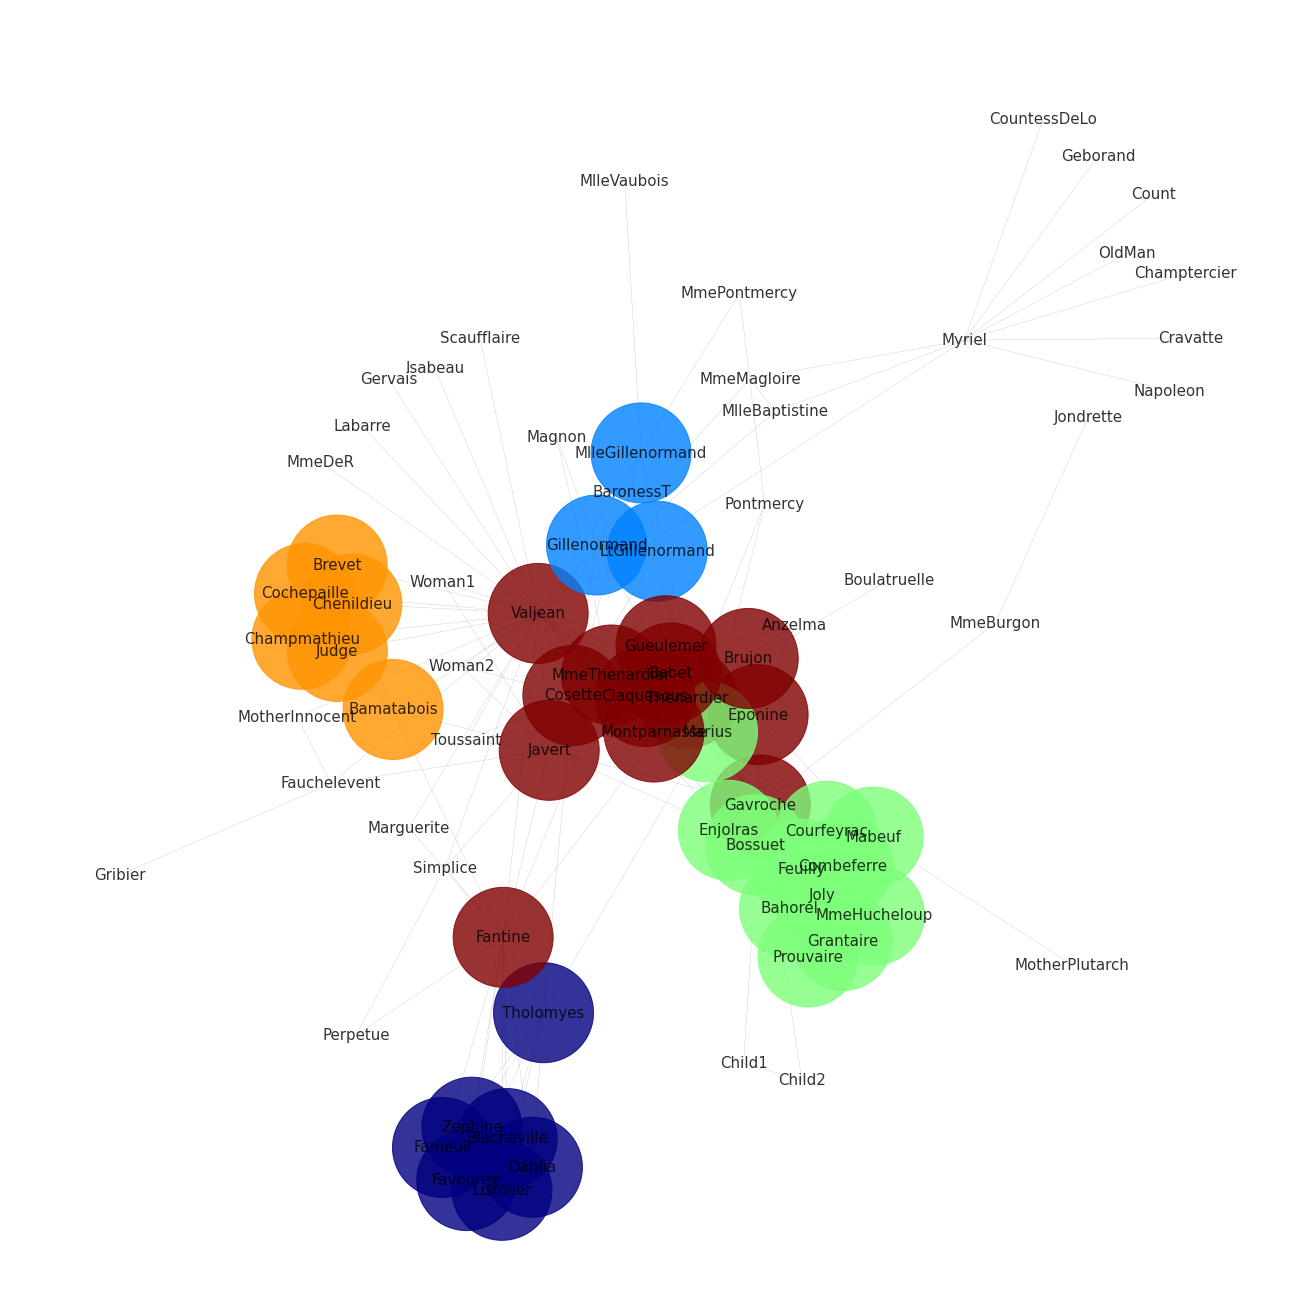

In [ ]:
plt.figure(figsize=(18,18))
nx.draw(g,**options)

# Link prediction
We now focus on link prediction and tackle this problem using 2 methods: unsupervised and supervised.

## Unsupervised
We start by the unsupervised perspective. 
We first build a Panda Series from the edges of the graph and then select a sample of size 50 from this series.

In [ ]:
series_edge = pd.Series(g.edges())
samples = series_edge.sample(50)
samples[:10]

Combeferre   Joly             {'value': 5}
Gavroche     Courfeyrac       {'value': 7}
Blacheville  Dahlia           {'value': 3}
Myriel       Geborand         {'value': 1}
Feuilly      Courfeyrac       {'value': 6}
Claquesous   Montparnasse     {'value': 2}
Valjean      Gueulemer        {'value': 1}
Chenildieu   Cochepaille      {'value': 2}
Fantine      MmeThenardier    {'value': 2}
Thenardier   Claquesous       {'value': 4}
dtype: object

In [ ]:
for i in samples.keys():
  print(i)

('Combeferre', 'Joly')
('Gavroche', 'Courfeyrac')
('Blacheville', 'Dahlia')
('Myriel', 'Geborand')
('Feuilly', 'Courfeyrac')
('Claquesous', 'Montparnasse')
('Valjean', 'Gueulemer')
('Chenildieu', 'Cochepaille')
('Fantine', 'MmeThenardier')
('Thenardier', 'Claquesous')
('Cosette', 'Gillenormand')
('Valjean', 'Simplice')
('Enjolras', 'Combeferre')
('Fantine', 'Bamatabois')
('Enjolras', 'MmeHucheloup')
('Javert', 'Toussaint')
('Myriel', 'MlleBaptistine')
('Valjean', 'Judge')
('Tholomyes', 'Fameuil')
('MmeThenardier', 'Babet')
('MlleBaptistine', 'Valjean')
('Valjean', 'MmeThenardier')
('Valjean', 'Woman1')
('Cosette', 'Marius')
('Tholomyes', 'Zephine')
('Valjean', 'Marius')
('Myriel', 'Champtercier')
('Gillenormand', 'LtGillenormand')
('Blacheville', 'Favourite')
('Javert', 'Bamatabois')
('Valjean', 'Isabeau')
('Mabeuf', 'Bahorel')
('Favourite', 'Dahlia')
('Gavroche', 'Gueulemer')
('Combeferre', 'Grantaire')
('Valjean', 'MlleGillenormand')
('Gavroche', 'Joly')
('Fauchelevent', 'MotherInnoc

Then, in order to see if metrics we have discussed in this lecture are effective, edges in the sample have to be removed from a copied version of `g`.

In [ ]:
g_copy = nx.Graph(g)

In [ ]:
for e1 in samples.keys():
  g_copy.remove_edge(e1[0],e1[1])

In [ ]:
print(len(g.edges()))
print(len(g_copy.edges()))

254
204


We can calculate some metrics to determine the strength of a potential link between two nodes. We will then select the top 50 potential links and compare them to the one we have just removed to assess how effective are these metrics over this dataset. You will apply the following methodology:

  1. Calculate the metrics for all non-existant pairs of nodes
  2. Build a dataframe to store these scores and extract the top 50 potential links
  3. Use the `isin` function over the sample of edges to count how many removed edges are in the top 50
  
Repeat this process with the following link prediction metrics :
  1. Resource allocation index
  2. Jaccard coefficient
  3. Adamic-Adar index
  4. Preferential attachment

In [ ]:
import numpy as np

In [ ]:
# Resource allocation index 

# calcul des metrics
resource = list(nx.resource_allocation_index(g_copy))
print(resource)
# dataframe
df = pd.DataFrame.from_records(resource, columns=["n1","n2","potential"], index=["n1","n2"])
# récuperer les 50 premiers lignes dans l'ordre décroissant 
largest = df.nlargest(50,"potential")
# récup des samples_edges pour les comparés aux prédicted_edges
predicted = largest.index.values
# pairs des predicted edges 
samples_keys = samples.keys()
# comparaison par pairs de edge 
s = samples_keys.isin(predicted)
# résultat 
print("Nombre de prédictions correctes : ",np.count_nonzero(s),"/ 50")

[('Gribier', 'MlleBaptistine', 0), ('Gribier', 'Brevet', 0), ('Gribier', 'Dahlia', 0), ('Gribier', 'Favourite', 0), ('Gribier', 'Champmathieu', 0), ('Gribier', 'Myriel', 0), ('Gribier', 'Champtercier', 0), ('Gribier', 'Gillenormand', 0), ('Gribier', 'Woman2', 0), ('Gribier', 'Judge', 0), ('Gribier', 'Gavroche', 0), ('Gribier', 'Feuilly', 0), ('Gribier', 'Grantaire', 0), ('Gribier', 'Cosette', 0), ('Gribier', 'OldMan', 0), ('Gribier', 'Fantine', 0), ('Gribier', 'Boulatruelle', 0), ('Gribier', 'Bamatabois', 0), ('Gribier', 'Marius', 0), ('Gribier', 'MmeThenardier', 0), ('Gribier', 'BaronessT', 0), ('Gribier', 'Zephine', 0), ('Gribier', 'Magnon', 0), ('Gribier', 'Scaufflaire', 0), ('Gribier', 'Thenardier', 0), ('Gribier', 'Isabeau', 0), ('Gribier', 'Tholomyes', 0), ('Gribier', 'MmeHucheloup', 0), ('Gribier', 'MmeMagloire', 0), ('Gribier', 'MlleGillenormand', 0), ('Gribier', 'Geborand', 0), ('Gribier', 'Toussaint', 0), ('Gribier', 'Prouvaire', 0), ('Gribier', 'Child1', 0), ('Gribier', 'Mll

In [ ]:
# Jaccard Coef

# calcul des metrics
jaccard_coef = nx.jaccard_coefficient(g_copy)
# dataframe
df = pd.DataFrame.from_records(jaccard_coef, columns=["n1","n2","potential"], index=["n1","n2"])
# récuperer les 50 premiers lignes dans l'ordre décroissant 
largest = df.nlargest(50,"potential")
# récup des samples_edges pour les comparés aux prédicted_edges
samples_keys = samples.keys()
# pairs des predicted edges 
predicted = largest.index.values
# comparaison par pairs de edge 
s = samples_keys.isin(predicted)
# résultat 
print("Nombre de prédictions correctes : ",np.count_nonzero(s),"/ 50")

Nombre de prédictions correctes :  8 / 50


In [ ]:
# academic 
adamic = nx.adamic_adar_index(g_copy)
df = pd.DataFrame.from_records(adamic, columns=["n1","n2","potential"], index=["n1","n2"])
largest = df.nlargest(50,"potential")
predicted = largest.index.values
samples_keys = samples.keys()
s = samples_keys.isin(predicted)
print("Nombre de prédictions correctes : ",np.count_nonzero(s),"/ 50")

Nombre de prédictions correctes :  19 / 50


In [ ]:
# preferential 
preferentiel = nx.preferential_attachment(g_copy)
df = pd.DataFrame.from_records(preferentiel, columns=["n1","n2","potential"], index=["n1","n2"])
largest = df.nlargest(50,"potential")
predicted = largest.index.values
samples_keys = samples.keys()
s = samples_keys.isin(predicted)
print("Nombre de prédictions correctes : ",np.count_nonzero(s),"/ 50")

Nombre de prédictions correctes :  6 / 50


## Supervised
From previous results, it is hard to say that the above-used features are outstanding... We now try to combine them in a supervised setting. To achieve this, please carrefully apply the following procedure.

1/ Set a variable `sizeTestSet` to 50, a variable `sizeTrainingPositiveSet` to the number of edges in g minus the size of the test set and, a variable `sizeTrainingSet` to 2 times the size of the positive training set.

In [ ]:
sizeTestSet = 50
sizeTrainingPositiveSet = len(g.edges()) - sizeTestSet
sizeTrainingSet = 2 * sizeTrainingPositiveSet

print(f"{sizeTrainingPositiveSet},{sizeTrainingSet}")

204,408


2/ We will build the positive training set and the test set. To do so, first copy the graph `g` into `g_training`. Second, generate a sample of size `sizeTestSet`, denoted by `sampleTest`, from the series of edges of `g_training`. This sample will be your test set (we will apply our model on it and hope the existence of a link will be predicted). Then, remove from `g_training` the edges in `sampleTest`. Finally, convert the remaining edges as a series.

In [ ]:
g_training = nx.Graph(g)

In [ ]:
series_edge = pd.Series(g_training.edges())
sampleTest = series_edge.sample(sizeTestSet)
sampleTest[:10]

Enjolras       Claquesous      {'value': 1}
Valjean        Scaufflaire     {'value': 1}
Bahorel        Joly            {'value': 5}
Cosette        Gillenormand    {'value': 3}
Valjean        Marguerite      {'value': 1}
Bamatabois     Chenildieu      {'value': 1}
Jondrette      MmeBurgon       {'value': 1}
Eponine        Gueulemer       {'value': 1}
Tholomyes      Favourite       {'value': 3}
MmeThenardier  Cosette         {'value': 4}
dtype: object

In [ ]:
# suppression des edges de sampleTest dans g_training 
for e in sampleTest.keys() : 
    g_training.remove_edge(e[0],e[1])

In [ ]:
print(len(g_training.edges()))
print(len(g.edges()))

204
254


In [ ]:
# to_series  
samplePositiveTraining = pd.Series(g_training.edges()).keys()
samplePositiveTraining[10:]

MultiIndex([(     'Valjean',       'Isabeau'),
            (     'Valjean',       'Gervais'),
            (     'Valjean', 'MmeThenardier'),
            (     'Valjean',       'Cosette'),
            (     'Valjean',        'Javert'),
            (     'Valjean',  'Fauchelevent'),
            (     'Valjean',    'Bamatabois'),
            (     'Valjean',      'Simplice'),
            (     'Valjean',        'Woman1'),
            (     'Valjean',         'Judge'),
            ...
            (   'Gueulemer',    'Claquesous'),
            (   'Gueulemer',  'Montparnasse'),
            (   'Gueulemer',        'Brujon'),
            (       'Babet',    'Claquesous'),
            (       'Babet',  'Montparnasse'),
            (       'Babet',        'Brujon'),
            (  'Claquesous',  'Montparnasse'),
            (  'Claquesous',        'Brujon'),
            ('Montparnasse',        'Brujon'),
            (      'Child1',        'Child2')],
           length=194)

3/ To balance the training set, we will randomly pick pairs of unconnected vertices (negative class). The number of pairs should be equal to the number of considered connections (positive class) in the training set. Find a way to generate this negative training set and name it `sampleNegativeTraining`.

In [ ]:
L = len(samplePositiveTraining)
nb_nodes = len(g.nodes())
nodes = list(g.nodes())
tmp = []

# le boucle ne s'arrêtera pas tant qu'on pas autant de negatif que de positif 
while len(tmp) < L:
  # on génére des indices random 
  i1,i2 = np.random.randint(0,nb_nodes-1) , np.random.randint(0,nb_nodes-1)
  # on récupére les noeuds à ces ind
  n1,n2 = nodes[i1], nodes[i2]
  # on les ajoutes uniquement s'ils sont pas liés 
  if not g.has_edge(n1,n2):
    tmp.append((n1,n2))

In [ ]:
print(len(tmp))
print(tmp)

204
[('Count', 'Bamatabois'), ('Champtercier', 'Blacheville'), ('Geborand', 'Gervais'), ('MmeDeR', 'Champtercier'), ('Child2', 'Claquesous'), ('Napoleon', 'CountessDeLo'), ('Child2', 'Gueulemer'), ('Anzelma', 'Joly'), ('Brevet', 'Montparnasse'), ('Pontmercy', 'Fantine'), ('Claquesous', 'Dahlia'), ('Thenardier', 'Cravatte'), ('Gavroche', 'Gervais'), ('MotherInnocent', 'Listolier'), ('Marius', 'Listolier'), ('LtGillenormand', 'Claquesous'), ('Bossuet', 'Tholomyes'), ('Simplice', 'Courfeyrac'), ('Magnon', 'Gavroche'), ('MmePontmercy', 'Magnon'), ('Gribier', 'Gribier'), ('Enjolras', 'MlleGillenormand'), ('Bossuet', 'CountessDeLo'), ('Boulatruelle', 'Gervais'), ('Feuilly', 'Brujon'), ('Scaufflaire', 'MmeDeR'), ('Thenardier', 'Perpetue'), ('Javert', 'Marius'), ('Blacheville', 'Marius'), ('Myriel', 'MmeBurgon'), ('Toussaint', 'Blacheville'), ('Champmathieu', 'MlleVaubois'), ('Simplice', 'Feuilly'), ('Simplice', 'MmeBurgon'), ('Fameuil', 'Pontmercy'), ('Javert', 'Zephine'), ('Cochepaille', 'Ba

In [ ]:
sampleNegativeTraining = pd.Series(tmp)

In [ ]:
# transform positive sample from list to series 
tmp_2 = [i for i in samplePositiveTraining ]
samplePositiveTraining = pd.Series(tmp_2)
samplePositiveTraining

0        (Myriel, MlleBaptistine)
1           (Myriel, MmeMagloire)
2          (Myriel, CountessDeLo)
3                 (Myriel, Count)
4                (Myriel, OldMan)
                  ...            
199               (Babet, Brujon)
200    (Claquesous, Montparnasse)
201          (Claquesous, Brujon)
202        (Montparnasse, Brujon)
203              (Child1, Child2)
Length: 204, dtype: object

In [ ]:
# vérifie si elle a la même taille que le samplePositiveTraining
len(sampleNegativeTraining) == len(samplePositiveTraining)

True

In [ ]:
samplePositiveTraining[200]

('Claquesous', 'Montparnasse')

In [ ]:
sampleNegativeTraining[0]

('Count', 'Bamatabois')

4/ It is now time to calculate the features for each member of the training and test sets. The features list is presented below:
  1. size of the shortest path
  2. number of shortest paths
  3. for each community algorithm, does the vertices associated to a connection belongs to the same community (except -1) : 1 or 0
  4. for each link prediction algorithm, the strength of the connection
  
The feature list is:
```
features = [
    "lShortestPath",
    "nbShortestPath",
    "bipartition",
    "percolation",
    "fluid",
    "girvan",
    "resource",
    "jaccard",
    "adamic",
    "preferential",
    "class"
]
```

In [ ]:
features = [
    "lShortestPath",
    "nbShortestPath",
    "bipartition",
    "percolation",
    "fluid",
    "girvan",
    "resource",
    "jaccard",
    "adamic",
    "preferential",
    "class"
]


5/ Use the following code (and modify it if necessary) to create 2 empty data frames (one for the training set and the other for the test set).

In [ ]:
sampleTraining = pd.concat([samplePositiveTraining,sampleNegativeTraining],ignore_index=True)
dfTraining = pd.DataFrame(np.zeros((sizeTrainingSet, 11)), columns=features, index= pd.MultiIndex.from_tuples(sampleTraining))
dfTest = pd.DataFrame(np.zeros((sizeTestSet, 11)), columns=features, index= pd.MultiIndex.from_tuples(sampleTest.keys()))

In [ ]:
sampleTraining.head()

0    (Myriel, MlleBaptistine)
1       (Myriel, MmeMagloire)
2      (Myriel, CountessDeLo)
3             (Myriel, Count)
4            (Myriel, OldMan)
dtype: object

In [ ]:
dfTraining.head()

lShortestPath  nbShortestPath  bipartition  \
Myriel MlleBaptistine            0.0             0.0          0.0   
       MmeMagloire               0.0             0.0          0.0   
       CountessDeLo              0.0             0.0          0.0   
       Count                     0.0             0.0          0.0   
       OldMan                    0.0             0.0          0.0   

                       percolation  fluid  girvan  resource  jaccard  adamic  \
Myriel MlleBaptistine          0.0    0.0     0.0       0.0      0.0     0.0   
       MmeMagloire             0.0    0.0     0.0       0.0      0.0     0.0   
       CountessDeLo            0.0    0.0     0.0       0.0      0.0     0.0   
       Count                   0.0    0.0     0.0       0.0      0.0     0.0   
       OldMan                  0.0    0.0     0.0       0.0      0.0     0.0   

                       preferential  class  
Myriel MlleBaptistine           0.0    0.0  
       MmeMagloire              0.0    0.0  
       CountessDeLo             0.0    0.0  
       Count                    0.0    0.0  
       OldMan                   0.0    0.0

In [ ]:
dfTest.head()

,,lShortestPath,nbShortestPath,bipartition,percolation,fluid,girvan,resource,jaccard,adamic,preferential,class
Enjolras,Claquesous,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valjean,Scaufflaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bahorel,Joly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cosette,Gillenormand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valjean,Marguerite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6/ Write a function `calculateFeatures` with the following specifications:

INPUT : 
  - `sample`: the series of edges you want to calculate the feature values
  - `df`: the data frame you want to update
  - `training`: True if edges in `sample` are in the training set and False otherwise
  - `positive`: True if `training = True` and positive instances are considered
 
OUTPUT
  - No output

OBJECTIVE

Update `df` (the rows such that their indexes are in `sample`) with the feature values

In [ ]:
# def calculatefeatures( sample, df, positive=True, training = True)
# sample domaine : {sous_graph, sample_training, sample_test}
# positive = true ( ex positif => output = 1)
# positive = False ==> output 0
# Training = True ==> phase d'entrainement
# Training = False ==> phase de test 

In [ ]:
def calculate_features(sample,df,positive=True, training=True) : 
    
    for e in sample :
        
        # training
        if training : 
            # positive  ==>  on affecte 1 à "class" , 0 sinon 
            if positive :
                df["class"].loc[e] = 1

            else :
                df["class"].loc[e] = 0

        g2 = nx.Graph(g_training)
        
        if training and positive : 
            g2.remove_edge(e[0],e[1])

        #  ------- lShortestPath and nbShortestPath ---------
        
        if nx.has_path(g2,e[0], e[1]) :
            # les plus courts chemins entre les deux noeuds 
            df["lShortestPath"].loc[e] = nx.shortest_path_length(g2,e[0],e[1])
            # nombre des plus courts chemins 
            df["nbShortestPath"].loc[e] = len(nx.shortest_path(g2,e[0],e[1]))

        else : 
            # -1 s'il n'y a pas de chemin entre 2 noeuds
            df["lShortestPath"].loc[e] = -1
            df["nbShortestPath"].loc[e] = -1  


        # ------- Algos de communautés :  ---------

        # Pour chaque algo, il faut que les valeurs des 2 noeuds soient la même et différent de -1 pour leur affecter 1
        # 0 sinon 
        
        # bipartition 
        
        if g_training.nodes[e[0]]["bipartition"] == g_training.nodes[e[1]]["bipartition"] and g_training.nodes[e[0]]["bipartition"] != -1 :
            df["bipartition"].loc[e] = 1
        else :
            df["bipartition"].loc[e] = 0

        # percolation
        if g_training.nodes[e[0]]["percolation"] == g_training.nodes[e[1]]["percolation"] and g_training.nodes[e[0]]["percolation"] != -1 :
            df["percolation"].loc[e] = 1
        else :
            df["percolation"].loc[e] = 0

        # fluid 
        if g_training.nodes[e[0]]["fluid"] == g_training.nodes[e[1]]["fluid"] and g_training.nodes[e[0]]["fluid"] != -1 :
            df["fluid"].loc[e] = 1
        else :
            df["fluid"].loc[e] = 0
        
        # girvan
        if g_training.nodes[e[0]]["girvan"] == g_training.nodes[e[1]]["girvan"] and g_training.nodes[e[0]]["girvan"] != -1 :
            df["girvan"].loc[e] = 1
        else :
            df["girvan"].loc[e] = 0
        
        # -------- Algos de prédictions des liens : leur force de connexion ---------
        
        # resource allocation
        ra = nx.resource_allocation_index(g2,[e])

        # ra (et les autres) est de la forme : [(noeud1,noeud2,valeur du potentiel)]
        # alors next(ra)[2] nous permettra de récupérer directement le potentiel

        try:
          val_ra = next(ra)[2]
          df["resource"].loc[e] = val_ra
        except:
          print("resource allocation :Error")

        
        # jaccard
        jc = nx.jaccard_coefficient(g2,[e])
        try:
          val_jc = next(jc)[2]
          df["jaccard"].loc[e] = val_jc
        except:
          print(" jaccard : Error")

        # adamic      
        aa = nx.adamic_adar_index(g2,[e])
        try:
          val_aa = next(aa)[2]
          df["adamic"].loc[e] = val_aa
        except :
          print("adamic : Error ")

        # preferential       
        pa = nx.preferential_attachment(g2,[e])
        try:
          val_pa = next(pa)[2]
          df["preferential"].loc[e] = val_pa
        except:
          print("preferential : Error ")


7/ Call the function with the apropriate parameters (tips: it should be called 3 times)

In [ ]:
# Train : 
calculate_features(sample = samplePositiveTraining, df = dfTraining, positive = True, training=True)
# DecisionTree :
calculate_features(sample = sampleNegativeTraining, df = dfTraining, positive = False, training=True)
# Test : {
calculate_features(sample = sampleTest.keys(), df = dfTest, positive = True, training=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


In [ ]:
dfTraining.head(10)

lShortestPath  nbShortestPath  bipartition  \
Myriel         MlleBaptistine            2.0             3.0          0.0   
               MmeMagloire               2.0             3.0          0.0   
               CountessDeLo             -1.0            -1.0          0.0   
               Count                    -1.0            -1.0          0.0   
               OldMan                   -1.0            -1.0          0.0   
               Valjean                   2.0             3.0          0.0   
MlleBaptistine MmeMagloire               2.0             3.0          0.0   
               Valjean                   2.0             3.0          0.0   
MmeMagloire    Valjean                   2.0             3.0          0.0   
Valjean        MmeDeR                   -1.0            -1.0          0.0   

                               percolation  fluid  girvan  resource   jaccard  \
Myriel         MlleBaptistine          0.0    0.0     0.0  0.370370  0.400000   
               MmeMagloire             0.0    0.0     0.0  0.370370  0.400000   
               CountessDeLo            0.0    0.0     0.0  0.000000  0.000000   
               Count                   0.0    0.0     0.0  0.000000  0.000000   
               OldMan                  0.0    0.0     0.0  0.000000  0.000000   
               Valjean                 0.0    0.0     0.0  0.666667  0.068966   
MlleBaptistine MmeMagloire             0.0    0.0     0.0  0.203704  1.000000   
               Valjean                 0.0    0.0     0.0  0.500000  0.076923   
MmeMagloire    Valjean                 0.0    0.0     0.0  0.500000  0.076923   
Valjean        MmeDeR                  0.0    0.0     0.0  0.000000  0.000000   

                                 adamic  preferential  class  
Myriel         MlleBaptistine  1.213652          10.0    1.0  
               MmeMagloire     1.213652          10.0    1.0  
               CountessDeLo    0.000000           0.0    1.0  
               Count           0.000000           0.0    1.0  
               OldMan          0.000000           0.0    1.0  
               Valjean         1.820478         130.0    1.0  
MlleBaptistine MmeMagloire     0.861524           4.0    1.0  
               Valjean         1.468350          52.0    1.0  
MmeMagloire    Valjean         1.468350          52.0    1.0  
Valjean        MmeDeR          0.000000           0.0    1.0

8/ Apply the following code and conclude:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

features = list(dfTraining.columns[:10])
y = dfTraining["class"]
X = dfTraining[features]
dt = DecisionTreeClassifier(min_samples_split=10, random_state=99)
dt.fit(X, y)
dt.predict(dfTest[features])

array([0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.])